# Capstone Project 3


![California Housing](https://miro.medium.com/max/1400/1*DD_mzNoCNBFI01yvv-B-zw.png)

By [Anita Antono](https://github.com/AnitaAntono)


Pada project ini dataset yang saya gunakan adalah California Housing, Dataset ini adalah versi modifikasi dari dataset California Housing yang tersedia dari halaman Luís Torgo (University of Porto). Luís Torgo memperolehnya dari repositori StatLib (yang sekarang ditutup).

Dataset ini muncul dalam makalah 1997 berjudul Sparse Spatial Autoregressions oleh Pace, R. Kelley dan Ronald Barry, yang diterbitkan dalam jurnal Statistics and Probability Letters. Mereka membangunnya menggunakan data sensus California 1990. Ini berisi satu baris per kelompok blok sensus. Grup blok adalah unit geografis terkecil tempat Biro Sensus AS menerbitkan data sampel (grup blok biasanya memiliki populasi 600 hingga 3.000 orang).

Dataset dalam direktori ini hampir identik dengan aslinya, dengan dua perbedaan:
137 nilai dihapus secara acak dari kolom total_bedrooms, ocean_proximity telah ditambahkan, yang menunjukkan apakah setiap cluster blok berada di dekat laut, dekat area Teluk, pedalaman atau di sebuah pulau? apa yang harus dilakukan dengan data kategorikal?

Data set terdiri dari 14448 baris dan 10 kolom, dengan dua tipe data, float64 sebanyak 9 kolom dan object 1 kolom.. 

Keterangan Dataset sebagai berikut:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. oceanProximity: Location of the house w.r.t ocean/sea

10. medianHouseValue: Median house value for households within a block (measured in US Dollars)


### <strong>Import Libraries<strong>

#####  Bagian ini berisi semua library yang akan digunakan dalam project.
---

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### <strong>Data Loading<strong>

##### Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.
---

In [76]:
df = pd.read_csv('data_california_house (1).csv')

In [77]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [4]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 14448
Number of columns: 10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [6]:
#Melihat data secara statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000


In [7]:
print("Total missing value on the dataset  :" , df.isnull().sum().sum())

pd.DataFrame({'missing value' : df.isnull().sum()})

Total missing value on the dataset  : 137


,missing value
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,137
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


*Note: Missing Value terdapat pada kolom 'total_bedrooms' sebanyak [137] pada tahapan ini saya hanya mengecheck Missing Value terdapat di kolom apa, tidak akan saya drop / melakukan handling apapun.

In [74]:
print(f'Percentage of missing values in total_bedrooms column: {(df.total_bedrooms.isna().sum()/len(df)*100):.2f}%')

Percentage of missing values in total_bedrooms column: 0.95%


### <strong>Exploratory Data Analysis / EDA<strong>

##### Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.
---

In [9]:
df_cor = df.corr()

for i in df_cor:
    h = 0
    df_cor[i] = np.where(df_cor[i].abs()>0.1, df_cor[i], 'low')

df_cor
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9251580725207723,-0.11750102930657781,low,low,0.10816097687410561,low,low,low
latitude,-0.9251580725207723,1.0,low,low,low,-0.11770417275360634,low,low,-0.1439567232840117
housing_median_age,-0.11750102930657781,low,1.0,-0.3678679024721588,-0.3294475697817316,-0.2997356936857166,-0.31239388305887167,-0.12039579860967592,0.10386295309055153
total_rooms,low,low,-0.3678679024721588,1.0,0.9319927113799279,0.8534601648100695,0.9192919984895209,0.19954874053590513,0.13197160188863588
total_bedrooms,low,low,-0.3294475697817316,0.9319927113799279,1.0,0.8746178152507962,0.9785614721478274,low,low
population,0.10816097687410561,-0.11770417275360634,-0.2997356936857166,0.8534601648100695,0.8746178152507962,1.0,0.9050613414876479,low,low
households,low,low,-0.31239388305887167,0.9192919984895209,0.9785614721478274,0.9050613414876479,1.0,low,low
median_income,low,low,-0.12039579860967592,0.19954874053590513,low,low,low,1.0,0.6932728173501709
median_house_value,low,-0.1439567232840117,0.10386295309055153,0.13197160188863588,low,low,low,0.6932728173501709,1.0


In [73]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925158,-0.117501,0.057288,0.079528,0.108161,0.064218,-0.010093,-0.045777
latitude,-0.925158,1.000000,0.020830,-0.048514,-0.076796,-0.117704,-0.080046,-0.085176,-0.143957
housing_median_age,-0.117501,0.020830,1.000000,-0.367868,-0.329448,-0.299736,-0.312394,-0.120396,0.103863
total_rooms,0.057288,-0.048514,-0.367868,1.000000,0.931993,0.853460,0.919292,0.199549,0.131972
total_bedrooms,0.079528,-0.076796,-0.329448,0.931993,1.000000,0.874618,0.978561,-0.004160,0.045915
population,0.108161,-0.117704,-0.299736,0.853460,0.874618,1.000000,0.905061,0.006284,-0.026183
households,0.064218,-0.080046,-0.312394,0.919292,0.978561,0.905061,1.000000,0.016365,0.061581
median_income,-0.010093,-0.085176,-0.120396,0.199549,-0.004160,0.006284,0.016365,1.000000,0.693273
median_house_value,-0.045777,-0.143957,0.103863,0.131972,0.045915,-0.026183,0.061581,0.693273,1.000000


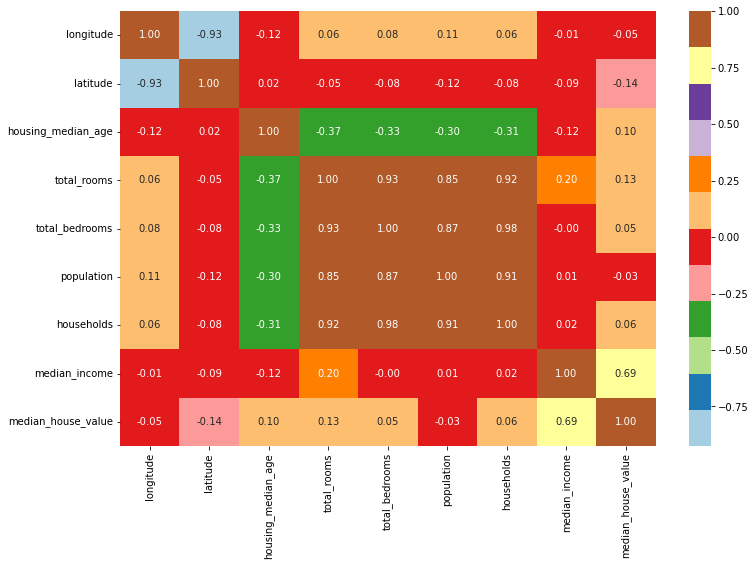

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Paired')

plt.show()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

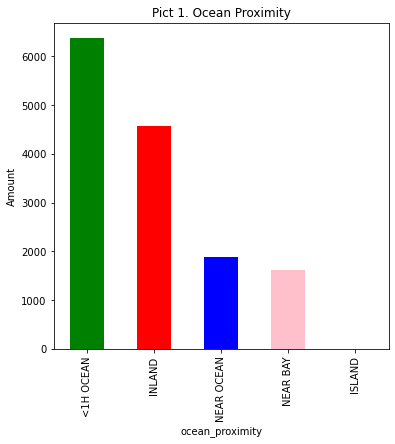

In [11]:
df['ocean_proximity'].value_counts().plot(kind='bar', figsize=(6, 6), width=0.5, color=['green','red','blue','pink','yellow'])
plt.xlabel('ocean_proximity')
plt.title('Pict 1. Ocean Proximity')
plt.ylabel('Amount')

df['ocean_proximity'].value_counts()


Pada data ada 5 jenis rumah berdasarkan jarak daratan dengan laut, jika dilihat dari grafiknya di daerah california paling banyak rumah yang jarak ke laut nya itu kurang dari 1 jam, dan yang paling sedikit itu rumah di pulau. dan setau saya di California tidak terdapat pulau.

In [12]:
df['ocean_proximity'].sort_values()

7223      <1H OCEAN
10589     <1H OCEAN
5159      <1H OCEAN
10591     <1H OCEAN
10592     <1H OCEAN
            ...    
2052     NEAR OCEAN
8942     NEAR OCEAN
3746     NEAR OCEAN
2058     NEAR OCEAN
2364     NEAR OCEAN
Name: ocean_proximity, Length: 14448, dtype: object

Text(0.5, 1.0, 'CLF House Group Location')

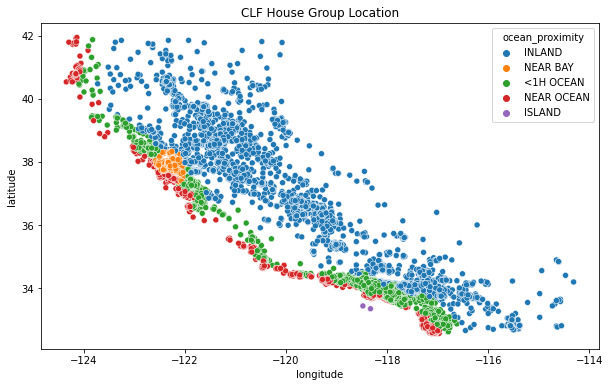

In [13]:
# Plot lokasi 'neighbourhood_group'
plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['ocean_proximity']).set_title('CLF House Group Location')

Berdasarkan scatterplot dapat dilihat bahwa persebaran rumah di pedalaman (Inland) sangat besar. near ocean lumayan banyak tetapi yang berjarak satu jam lebih dari ocean lebih banyak lagi, dan yang dekat dengan teluk hanya di suatu kumpulan (analisa saya mungkin ini seperti cluster yang dibangun dekat teluk), dan orang lebih memilih di Inland dibanding near ocean karena resiko tinggal di dekat laut itu lumayan besar dan sangat berbahaya, di khawatirkan adanya bencana alam tiba - tiba seperti tsunami atau tornado.

In [14]:
tot_pop = df.groupby("ocean_proximity", sort=False)["population"].sum().round(2)
tot_pop

ocean_proximity
INLAND        6375492.0
NEAR BAY      1959837.0
<1H OCEAN     9687368.0
NEAR OCEAN    2566454.0
ISLAND           1522.0
Name: population, dtype: float64

Text(0, 0.5, 'Amount')

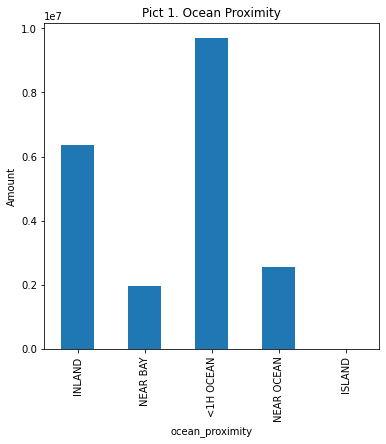

In [15]:
tot_pop.plot(kind='bar', figsize=(6, 6), width=0.5)
plt.xlabel('ocean_proximity')
plt.title('Pict 1. Ocean Proximity')
plt.ylabel('Amount')

Jumlah populasi di < 1H Ocean pling banyak diantra lainnya, dan jumlah populasi island paling sedikit.

Kolom housing_median_age memiliki nilai skewness: 0.0589291851805334


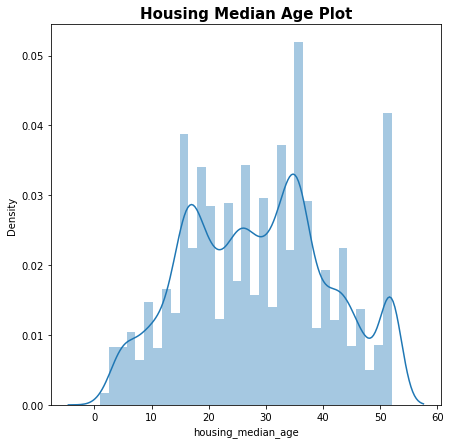

In [16]:
plt.figure(figsize=(7, 7))
sns.distplot(df['housing_median_age'])
plt.title('Housing Median Age Plot', size=15, weight='bold');
print('Kolom housing_median_age memiliki nilai skewness:',df['housing_median_age'].skew())

kalo di liat dari gambar sm nilai skewnessnya kolom housing_median_age terdistribusi secara normal

Kolom median_house_value memiliki nilai skewness: 0.9817544310070773


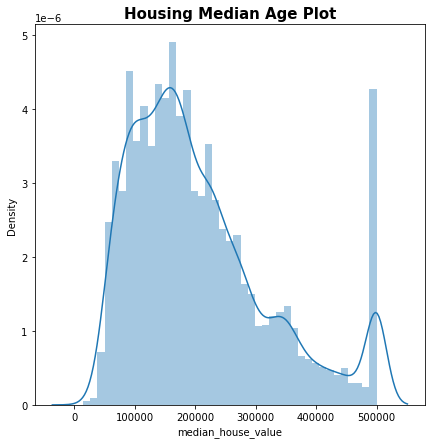

In [17]:
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('Housing Median Age Plot', size=15, weight='bold');
print('Kolom median_house_value memiliki nilai skewness:',df['median_house_value'].skew())

Kolom median_house_value dilihat dari gambar tidak terdistribusi normal / skewed

In [18]:
expen_house_val= df[df['median_house_value']>499999]

In [19]:
expen_house_val['ocean_proximity'].value_counts()

<1H OCEAN     376
NEAR OCEAN    153
NEAR BAY      151
INLAND         16
Name: ocean_proximity, dtype: int64

### <strong>Data Preprocessing<strong>

##### Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.
---

#### Data Inference

In [20]:
num_columns = df.select_dtypes(include = np.number).columns.tolist()
cat_columns = df.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Categorical Columns :  ['ocean_proximity']


- <ins>_Get Data Inference_<ins>

In [21]:
# Make a variable for data inference
df_inf = df.sample(100, random_state=33)

In [22]:
# Move out the data inference from the all data set
df_train_test = df.drop(df_inf.index)
df_train_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [23]:
# Reset index number from data inference and data set
df_train_test.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

- <ins>_Split the Data; define 'X' and 'y'_<ins>

In [24]:
# Move out the target from the data set
X = df_train_test.drop(['median_house_value'], axis=1)
y = df_train_test['median_house_value']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
print(X_train.shape)
print(X_test.shape)

(11478, 9)
(2870, 9)


- <ins>_Feature Selection_<ins>

In [26]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925158,-0.117501,0.057288,0.079528,0.108161,0.064218,-0.010093,-0.045777
latitude,-0.925158,1.000000,0.020830,-0.048514,-0.076796,-0.117704,-0.080046,-0.085176,-0.143957
housing_median_age,-0.117501,0.020830,1.000000,-0.367868,-0.329448,-0.299736,-0.312394,-0.120396,0.103863
total_rooms,0.057288,-0.048514,-0.367868,1.000000,0.931993,0.853460,0.919292,0.199549,0.131972
total_bedrooms,0.079528,-0.076796,-0.329448,0.931993,1.000000,0.874618,0.978561,-0.004160,0.045915
population,0.108161,-0.117704,-0.299736,0.853460,0.874618,1.000000,0.905061,0.006284,-0.026183
households,0.064218,-0.080046,-0.312394,0.919292,0.978561,0.905061,1.000000,0.016365,0.061581
median_income,-0.010093,-0.085176,-0.120396,0.199549,-0.004160,0.006284,0.016365,1.000000,0.693273
median_house_value,-0.045777,-0.143957,0.103863,0.131972,0.045915,-0.026183,0.061581,0.693273,1.000000


Based on correlation the median income give 

#### Missing Value Handling

In [27]:
X_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        110
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [28]:
X_test.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        26
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [29]:
X_train['total_bedrooms'].skew()

3.3394885498561355

In [30]:
X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace=True)
X_test['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace=True)

- <ins>_Checking the data and distribution columns_<ins>

In [31]:
preprocess_table = pd.DataFrame({'columns' : X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
preprocess_table.reset_index(drop=True, inplace=True)

preprocess_table['distribution status'] = np.where(preprocess_table['skew'].abs()>0.5, 'Skewed', 'Normal')

In [32]:
preprocess_table

,columns,skew,distribution status
0,longitude,-0.302204,Normal
1,latitude,0.470076,Normal
2,housing_median_age,0.057010,Normal
3,total_rooms,3.930220,Skewed
4,total_bedrooms,3.359640,Skewed
5,population,5.928408,Skewed
6,households,3.258300,Skewed
7,median_income,1.674004,Skewed


- <ins>_Detecting and Handling the outliers_<ins>

In [33]:
X_train_distr = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
X_train_distr.reset_index(drop=True, inplace=True)
X_train_distr['distribution'] = np.where((X_train_distr['skew'] < 0.5) & (X_train_distr['skew'] > - 0.5) , 'Normal', 'Skew')
X_train_distr

,columns,skew,distribution
0,longitude,-0.302204,Normal
1,latitude,0.470076,Normal
2,housing_median_age,0.057010,Normal
3,total_rooms,3.930220,Skew
4,total_bedrooms,3.359640,Skew
5,population,5.928408,Skew
6,households,3.258300,Skew
7,median_income,1.674004,Skew


- <ins>_Function to find upper and lower boundaries for normally distributed variables, Calculate the boundaries outside which sit the outliers for a Gaussian distribution_<ins>
- <ins>_Since it's skewed, using IQR to handle outliers_<ins>

In [34]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - distance * IQR
    upper = df[variable].quantile(0.75) + distance * IQR

    return upper, lower

In [35]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if X_train_distr['distribution'].loc[(X_train_distr['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Boundary Lower and Upper {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Boundary Lower and Upper longitude:(-125.58043050411993, -113.53819294944333)
Boundary Lower and Upper latitude:(29.20747133312791, 42.04445757434692)
Boundary Lower and Upper housing_median_age:(-9.401009765390356, 66.61289336880559)
Batas lower dan upper untuk total_rooms:(-1127.625, 5735.375)
Batas lower dan upper untuk total_bedrooms:(-229.0, 1171.0)
Batas lower dan upper untuk population:(-633.5, 3138.5)
Batas lower dan upper untuk households:(-214.0, 1098.0)
Batas lower dan upper untuk median_income:(-0.6667375000000004, 7.9573625)


In [36]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_distr_handling= X_train.loc[~outliers[k]]
    X_train_distr.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_distr_handling.shape[0]
    X_train_distr.loc[i,'percentage'] = np.round(100-(X_train_distr_handling.shape[0]/X_train.shape[0]*100), 2)
    X_train_distr.loc[i,'action'] = np.where(X_train_distr.loc[i,'percentage']==0, 'No Action', 
                                        np.where(X_train_distr.loc[i,'percentage']>5, 'Capping/Windsorizer', 'Trimming'))

X_train_distr

,columns,skew,distribution,trimmed_row,percentage,action
0,longitude,-0.302204,Normal,0.0,0.00,No Action
1,latitude,0.470076,Normal,0.0,0.00,No Action
2,housing_median_age,0.057010,Normal,0.0,0.00,No Action
3,total_rooms,3.930220,Skew,715.0,6.23,Capping/Windsorizer
4,total_bedrooms,3.359640,Skew,706.0,6.15,Capping/Windsorizer
5,population,5.928408,Skew,639.0,5.57,Capping/Windsorizer
6,households,3.258300,Skew,654.0,5.70,Capping/Windsorizer
7,median_income,1.674004,Skew,388.0,3.38,Trimming


In [37]:
outliers_tot = outliers['outliers2']
for i, (k, v) in enumerate(outliers.items()):
    if i in [7]:
        outliers_tot += outliers[k]

In [38]:
X_train_trimmed = X_train.loc[~outliers_tot]
y_train_trimmed = y_train.loc[~outliers_tot]

print(f"Jumlah baris pada X_train SEBELUM di Trimming: {X_train.shape[0]}")
print(f"Jumlah baris pada X_train SETELAH di Trimming: {X_train_trimmed.shape[0]}")
print(f"% Outlier dari Keseluruhan Data: {100-(X_train_trimmed.shape[0]/X_train.shape[0]*100):.2f}%")

Jumlah baris pada X_train SEBELUM di Trimming: 11478
Jumlah baris pada X_train SETELAH di Trimming: 11090
% Outlier dari Keseluruhan Data: 3.38%


In [39]:
# Reset Index

X_train_trimmed.reset_index(drop=True, inplace=True)
y_train_trimmed.reset_index(drop=True, inplace=True)

In [40]:
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['total_rooms', 'total_bedrooms', 'population', 'households'])

windsoriser.fit(X_train_trimmed)
X_train_t = windsoriser.transform(X_train_trimmed)


In [41]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'total_rooms': -1104.5, 'total_bedrooms': -227.0, 'population': -638.75, 'households': -212.0}
Right Tail Caps :  {'total_rooms': 5673.5, 'total_bedrooms': 1173.0, 'population': 3155.25, 'households': 1100.0}


In [42]:
print('X_train - Before Capping')
print(X_train.describe())
print('')
print('X_train - After Capping')
print(X_train_t.describe())

X_train - Before Capping
          longitude      latitude  housing_median_age   total_rooms  \
count  11478.000000  11478.000000        11478.000000  11478.000000   
mean    -119.559312     35.625964           28.605942   2638.779753   
std        2.007040      2.139498           12.668984   2175.430019   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.790000     33.930000           18.000000   1446.000000   
50%     -118.490000     34.260000           29.000000   2124.000000   
75%     -118.000000     37.720000           37.000000   3161.750000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  
count    11478.000000  11478.000000  11478.000000   11478.000000  
mean       536.621624   1421.671110    498.404252       3.862491  
std        418.205644   1152.930785    378.229827       1.900383  
min          1.000000      3.000000      1.000000       0.499900  


In [43]:
# Function to create histogram and boxplot for each features

def diagnostic_plots(df, df_trim, variable):
    #Define figure size
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True, color='#006699')
    plt.title(f'Histogram of {variable}')

    #Boxplot Before
    plt.subplot(1,3, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Before Handling in {variable}')

    #Boxplot After
    plt.subplot(1,3, 3)
    sns.boxplot(y=df_trim[variable])
    plt.title(f'After Handling in {variable}')

    plt.show()

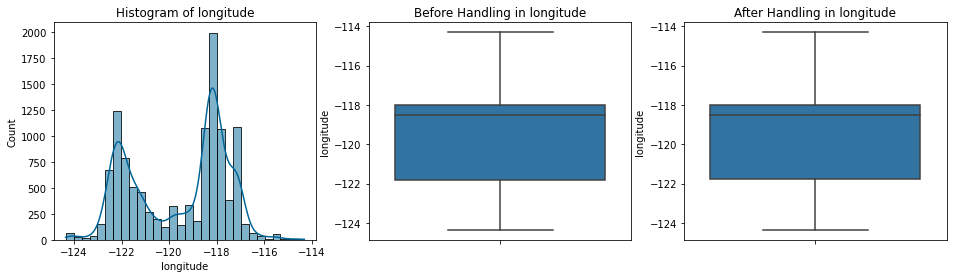

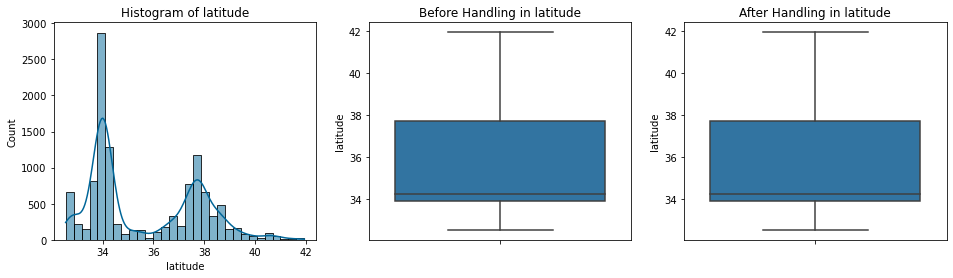

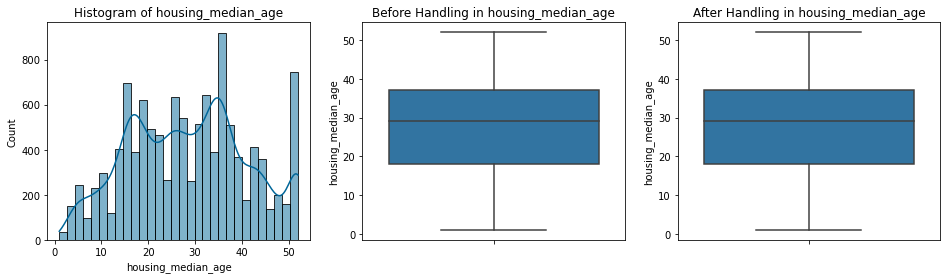

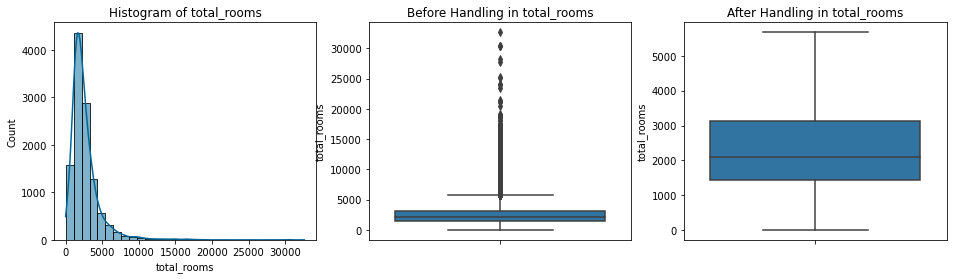

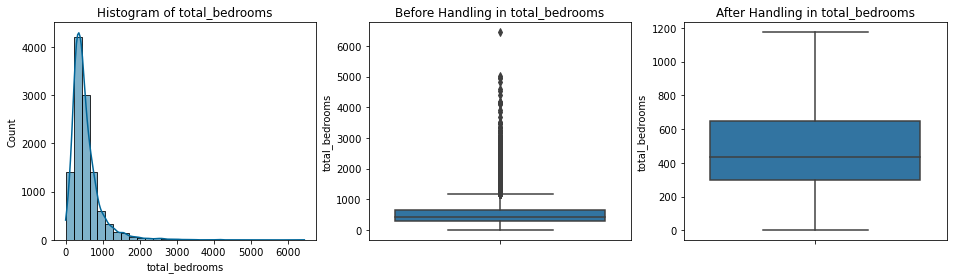

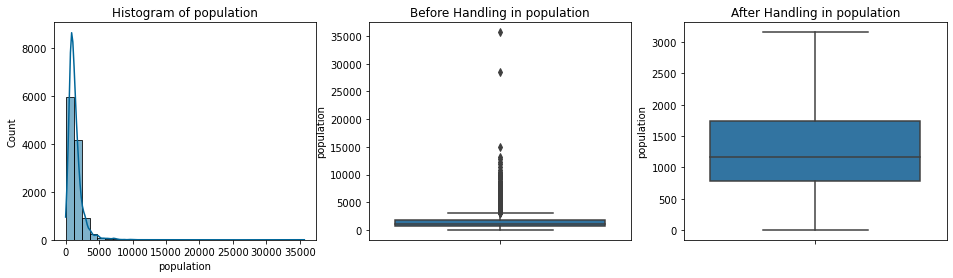

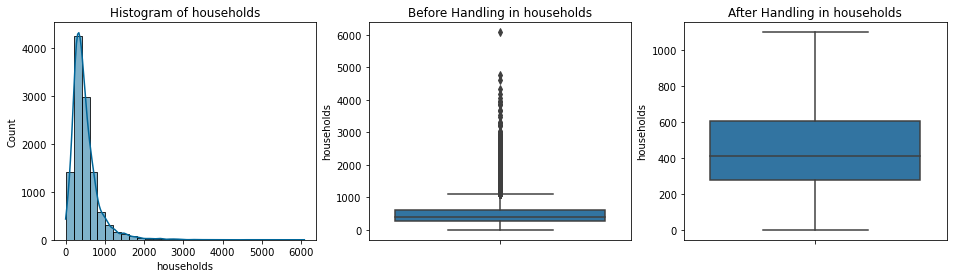

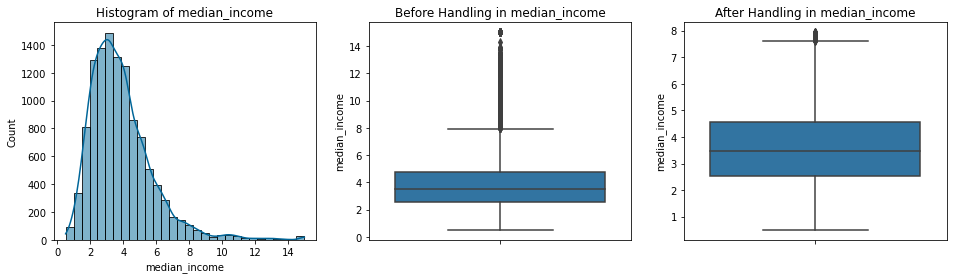

In [44]:
for i in X_train.describe().columns:
    diagnostic_plots(X_train, X_train_t, i)

##### Feature Scaling and Feature Encoding

In [45]:
# Get Numerical and Categorical Columns

num_columns = X_train_t.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_t.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical Columns :  ['ocean_proximity']


In [46]:
# Split on X_train

X_train_t_num = X_train_t[num_columns]
X_train_t_cat = X_train_t[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

* Feature Scaling

In [47]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_t_num_scaled = scaler.fit_transform(X_train_t_num)
X_test_num_scaled = scaler.transform(X_test_num)

* Feature Encoding

In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_t_cat_encoded = encoder.fit_transform(X_train_t_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

* Concate Numerical and Categorical

In [49]:
# Untuk model yang memerlukan scaler
X_train_final = np.concatenate([X_train_t_num_scaled, X_train_t_cat_encoded.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded.toarray()], axis=1)

In [50]:
X_train_final

array([[ 1.35373768, -1.21992447, -1.39625417, ...,  0.        ,
         0.        ,  0.        ],
       [-1.40319488,  0.90673821,  1.21805243, ...,  0.        ,
         0.        ,  1.        ],
       [-0.83588384,  0.32039357, -1.23781135, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.32387921, -0.92675216, -1.07936852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67694557, -0.74526453,  0.58428113, ...,  0.        ,
         0.        ,  0.        ],
       [-1.33850151,  1.00446231,  1.13883101, ...,  0.        ,
         1.        ,  0.        ]])

In [51]:
X_test_final

array([[-1.4131477 ,  0.91604526,  0.50505972, ...,  0.        ,
         0.        ,  1.        ],
       [-1.42807694,  1.00911584,  1.85182372, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69685122, -0.68476866,  1.85182372, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.12954019,  0.32970063, -0.36637581, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4878419 , -0.66615454, -0.12871158, ...,  0.        ,
         0.        ,  0.        ],
       [-1.02001111,  1.62338165,  0.34661689, ...,  0.        ,
         0.        ,  0.        ]])

### <strong>Model Definition<strong>

##### Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.
---

Dari dataset ini akan dibuat 5 model sebagai berikut,

- Linear Regression
- K-Nearest Neighbors
- Decision Tree
- Random Forest Regressor
- XGBoost

In [52]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=25)
rf = RandomForestRegressor(random_state=25)
xgb = XGBRegressor(random_state=25)

In [53]:
X_train_final.shape

(11090, 13)

In [54]:
y_train.shape

(11478,)

#### Model Training

Sekarang masing-masing model akan dilatih menggunakan `X_train` dan `y_train`.

In [55]:
%timeit lr.fit(X_train_final, y_train_trimmed)
%timeit knn.fit(X_train_final, y_train_trimmed)
%timeit dt.fit(X_train_final, y_train_trimmed)
%timeit rf.fit(X_train_final, y_train_trimmed)
%timeit xgb.fit(X_train_final, y_train_trimmed)

5.94 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.6 ms ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
77.6 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.79 s ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.44 s ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Jika dilihat dari waktu trainingnya model **Decision Tree** memakan waktu training paling lama, dan model **XGBoost** memakan waktu training paling cepat.

#### Model Evaluation

Pada bagian akan dilakukan evaluasi untuk melihat performa dengan menggunakan $R^2 Score$ dan $Mean Absolute Error$ (MAE) dari masing-masing model. 

- Linear Regression

In [56]:
%%time
print('----Training Set----')
print(f'Training Score: {lr.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, lr.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {lr.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr.predict(X_test_final))}')

----Training Set----
Training Score: 0.61
Training Mean Absolute Error (MAE): 48295.77848550874
----Testing Set----
Validation Score: 0.61
Validation Mean Absolute Error (MAE): 51684.98382654528
CPU times: user 13.9 ms, sys: 7.99 ms, total: 21.9 ms
Wall time: 6.61 ms


- KNN

In [57]:
%%time
print('----Training Set----')
print(f'Training Score: {knn.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, knn.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {knn.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, knn.predict(X_test_final))}')

----Training Set----
Training Score: 0.78
Training Mean Absolute Error (MAE): 33709.104977457166
----Testing Set----
Validation Score: 0.68
Validation Mean Absolute Error (MAE): 43656.75797909408
CPU times: user 790 ms, sys: 131 ms, total: 922 ms
Wall time: 585 ms


- Decision Tree

In [58]:
%%time
print('----Training Set----')
print(f'Training Score: {dt.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, dt.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {dt.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, dt.predict(X_test_final))}')

----Training Set----
Training Score: 1.00
Training Mean Absolute Error (MAE): 0.0
----Testing Set----
Validation Score: 0.61
Validation Mean Absolute Error (MAE): 46054.714634146345
CPU times: user 8.72 ms, sys: 1.33 ms, total: 10.1 ms
Wall time: 9.44 ms


- Random Forest

In [59]:
%%time
print('----Training Set----')
print(f'Training Score: {rf.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, rf.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {rf.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, rf.predict(X_test_final))}')

----Training Set----
Training Score: 0.97
Training Mean Absolute Error (MAE): 12290.114679891796
----Testing Set----
Validation Score: 0.78
Validation Mean Absolute Error (MAE): 35217.84148083624
CPU times: user 496 ms, sys: 6.57 ms, total: 503 ms
Wall time: 509 ms


- XGBoost

In [60]:
%%time
print('----Training Set----')
print(f'Training Score: {xgb.score(X_train_final, y_train_trimmed):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train_trimmed, xgb.predict(X_train_final))}')
print('----Testing Set----')
print(f'Validation Score: {xgb.score(X_test_final, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, xgb.predict(X_test_final))}')

----Training Set----
Training Score: 0.95
Training Mean Absolute Error (MAE): 17604.99595514681
----Testing Set----
Validation Score: 0.80
Validation Mean Absolute Error (MAE): 33434.98681844785
CPU times: user 90 ms, sys: 10.1 ms, total: 100 ms
Wall time: 36.6 ms


### Model Analysis

Dari hasil evaluasi pada 5 model diatas, didapatkan model **Linear Regression** memiliki akurasi paling rendah dengan **Validation score 0.61, MAE 48295.77** dan pada training setnya dan pada testing setnya mendapat **Validation Score 0.61** dan **MAE 51684.98**, walaupun score-score tersebut tergolong bagus namun jika dibandingkan dengan model lainnya **akurasi dari Linear Regression ini yang paling rendah**.

Sedangkan model **XGBoost** memiliki akurasi paling tinggi dengan **Validation Score 0.95** dan **MAE 17604.99** pada training setnya dan pada testing setnya mendapat **Validation Score 0.80** dengan **MAE 33434.986**.

Jika dilihat dari waktu trainingnya model **Decision Tree** memakan waktu training paling lama, dan model **XGBoost** memakan waktu training paling cepat.


#### Model Testing (Inference Data)

Pada bagian ini masing-masing model akan diuji dengan menggunakan **10 data inference** yang sudah dipisahkan dari training set dan validation set.

In [61]:
inference = df_inf.reset_index(drop=True)
inference

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-118.18,33.93,31.0,1516.0,400.0,1820.0,398.0,2.1641,<1H OCEAN,122900.0
1,-118.25,33.93,42.0,763.0,191.0,754.0,174.0,2.0486,<1H OCEAN,101800.0
2,-118.30,33.98,48.0,1998.0,410.0,1176.0,382.0,3.0455,<1H OCEAN,102400.0
3,-118.20,33.82,34.0,2807.0,768.0,2217.0,744.0,2.4286,NEAR OCEAN,204800.0
4,-120.15,39.36,9.0,2254.0,400.0,694.0,243.0,5.6856,INLAND,138100.0
...,...,...,...,...,...,...,...,...,...,...
95,-117.38,34.08,11.0,5684.0,1139.0,3095.0,1036.0,3.6875,INLAND,112600.0
96,-118.34,34.18,45.0,3566.0,701.0,1601.0,653.0,3.8668,<1H OCEAN,232000.0
97,-118.98,35.38,39.0,1497.0,383.0,1182.0,355.0,1.0648,INLAND,50000.0
98,-117.90,33.76,26.0,2678.0,702.0,3262.0,685.0,3.6953,<1H OCEAN,176800.0


#### Inference Preprocessing

Sebeleum data inference ini dapat digunakan untuk diprediksi, data inference ini akan **dilakukan preprocessing sama seperti pada data testing**.

In [62]:
# Split Numerical and Categorical Features
inference_num = inference[num_columns]
inference_cat = inference[cat_columns]

# Scale Numerical Features
inference_num_scaled = scaler.transform(inference_num)

# Encode Categorical Features
inference_cat_encoded = encoder.transform(inference_cat)

# Concatenate Numerical and Categorical Features
inference_final = np.concatenate([inference_num_scaled, inference_cat_encoded.toarray()], axis=1)

#### Infernce Prediction

Setelah data inference melalui preprocessing, sekarang melakukan prediksi pada data inference pada setiap model.

In [63]:
inference

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-118.18,33.93,31.0,1516.0,400.0,1820.0,398.0,2.1641,<1H OCEAN,122900.0
1,-118.25,33.93,42.0,763.0,191.0,754.0,174.0,2.0486,<1H OCEAN,101800.0
2,-118.30,33.98,48.0,1998.0,410.0,1176.0,382.0,3.0455,<1H OCEAN,102400.0
3,-118.20,33.82,34.0,2807.0,768.0,2217.0,744.0,2.4286,NEAR OCEAN,204800.0
4,-120.15,39.36,9.0,2254.0,400.0,694.0,243.0,5.6856,INLAND,138100.0
...,...,...,...,...,...,...,...,...,...,...
95,-117.38,34.08,11.0,5684.0,1139.0,3095.0,1036.0,3.6875,INLAND,112600.0
96,-118.34,34.18,45.0,3566.0,701.0,1601.0,653.0,3.8668,<1H OCEAN,232000.0
97,-118.98,35.38,39.0,1497.0,383.0,1182.0,355.0,1.0648,INLAND,50000.0
98,-117.90,33.76,26.0,2678.0,702.0,3262.0,685.0,3.6953,<1H OCEAN,176800.0


In [64]:
X_inf = inference.drop(['median_house_value'], axis=1)
y_inf = inference['median_house_value']
X_inf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.18,33.93,31.0,1516.0,400.0,1820.0,398.0,2.1641,<1H OCEAN
1,-118.25,33.93,42.0,763.0,191.0,754.0,174.0,2.0486,<1H OCEAN
2,-118.30,33.98,48.0,1998.0,410.0,1176.0,382.0,3.0455,<1H OCEAN
3,-118.20,33.82,34.0,2807.0,768.0,2217.0,744.0,2.4286,NEAR OCEAN
4,-120.15,39.36,9.0,2254.0,400.0,694.0,243.0,5.6856,INLAND
...,...,...,...,...,...,...,...,...,...
95,-117.38,34.08,11.0,5684.0,1139.0,3095.0,1036.0,3.6875,INLAND
96,-118.34,34.18,45.0,3566.0,701.0,1601.0,653.0,3.8668,<1H OCEAN
97,-118.98,35.38,39.0,1497.0,383.0,1182.0,355.0,1.0648,INLAND
98,-117.90,33.76,26.0,2678.0,702.0,3262.0,685.0,3.6953,<1H OCEAN


In [65]:
X_inf.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        1
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [66]:
X_inf['total_bedrooms'].skew()

1.9119003314779246

In [67]:
X_inf['total_bedrooms'].fillna(X_inf['total_bedrooms'].median(), inplace=True)

In [68]:
# Split Numerical and Categorical Columns

df_inf_num = X_inf[num_columns]
df_inf_cat = X_inf[cat_columns]

In [69]:
df_inf_num_scaled = scaler.transform(df_inf_num)
df_inf_cat_encoded = encoder.transform(df_inf_cat)

In [70]:
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded.toarray()], axis=1)

In [71]:
#y_pred_inf_lr = lr.predict(df_inf)
#y_pred_inf_knn = knn.predict(inference)
y_pred_inf_dt = dt.predict(df_inf_final)
#y_pred_inf_rf = rf.predict(inference)
y_pred_inf_xgb = xgb.predict(df_inf_final)

In [72]:
y_pred_inf_xgb_frame = pd.DataFrame(y_pred_inf_xgb, columns=['median_harga'])
y_pred_inf_xgb_frame

,median_harga
0,133154.062500
1,91692.945312
2,115014.437500
3,159800.015625
4,220916.484375
...,...
95,138616.781250
96,270388.781250
97,48166.628906
98,167149.046875


##### Kesimpulan analysis

Pada project ini dataset yang saya gunakan adalah California Housing, Dataset ini adalah versi modifikasi dari dataset California Housing yang tersedia dari halaman Luís Torgo (University of Porto). Luís Torgo memperolehnya dari repositori StatLib (yang sekarang ditutup).

Dataset ini muncul dalam makalah 1997 berjudul Sparse Spatial Autoregressions oleh Pace, R. Kelley dan Ronald Barry, yang diterbitkan dalam jurnal Statistics and Probability Letters. Mereka membangunnya menggunakan data sensus California 1990. Ini berisi satu baris per kelompok blok sensus. Grup blok adalah unit geografis terkecil tempat Biro Sensus AS menerbitkan data sampel (grup blok biasanya memiliki populasi 600 hingga 3.000 orang).

Dataset dalam direktori ini hampir identik dengan aslinya, dengan dua perbedaan:
137 nilai dihapus secara acak dari kolom total_bedrooms, ocean_proximity telah ditambahkan, yang menunjukkan apakah setiap cluster blok berada di dekat laut, dekat area Teluk, pedalaman atau di sebuah pulau? apa yang harus dilakukan dengan data kategorikal?

Data set terdiri dari 14448 baris dan 10 kolom, dengan dua tipe data, float64 sebanyak 9 kolom dan object 1 kolom.. 

Keterangan Dataset sebagai berikut:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. oceanProximity: Location of the house w.r.t ocean/sea

10. medianHouseValue: Median house value for households within a block (measured in US Dollars)

Missing Value terdapat pada kolom 'total_bedrooms' sebanyak 137, dan ini menghilangkan 0.95% data pada kolom ini.

Saya melakukan beberapa data vizualization, dan mengambil kesimpulan sebagai berikut:

- Pada data ada 5 jenis rumah berdasarkan jarak daratan dengan laut, jika dilihat dari grafiknya di daerah california paling banyak rumah yang jarak ke laut nya itu kurang dari 1 jam, dan yang paling sedikit itu rumah di pulau. dan setau saya di California tidak terdapat pulau.

- Berdasarkan scatterplot dapat dilihat bahwa persebaran rumah di pedalaman (Inland) sangat besar. near ocean lumayan banyak tetapi yang berjarak satu jam lebih dari ocean lebih banyak lagi, dan yang dekat dengan teluk hanya di suatu kumpulan (analisa saya mungkin ini seperti cluster yang dibangun dekat teluk), dan orang lebih memilih di Inland dibanding near ocean karena resiko tinggal di dekat laut itu lumayan besar dan sangat berbahaya, di khawatirkan adanya bencana alam tiba - tiba seperti tsunami atau tornado.

- Jumlah populasi di < 1H Ocean pling banyak diantra lainnya, dan jumlah populasi island paling sedikit.

- Jika di liat dari gambar dan nilai skewnessnya kolom housing_median_age terdistribusi secara normal.

Setelah itu baru melakukan data preprocessing, untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan. Pertama melakukan data inference, feature selection, menghandle missing value pada kolom total_bedrooms dengan menggunakan median, lalu baru memeriksa outlier pada data, 

columns	                skew distribution

- longitude	            -0.302204	Normal
- latitude	            0.470076	Normal
- housing_median_age	0.057010	Normal
- total_rooms	        3.930220	Skew
- total_bedrooms	    3.359640	Skew
- population	        5.928408	Skew
- households	        3.258300	Skew
- median_income	        1.674004	Skew

Setelah melihat skew atau normal distribusi datanya, baru dapat melakukan handling outlier,


columns	                  skew		distribution    trimmed_row	  percentage	     action
- longitude	      		-0.302204	   Normal	       0.0	        0.00	        No Action
- latitude				0.470076	   Normal		   0.0	        0.00			No Action
- housing_median_age	0.057010	   Normal		   0.0	        0.00			No Action
- total_rooms			3.930220		Skew		   715.0	    6.23	    Capping/Windsorizer
- total_bedrooms		3.359640		Skew		   706.0	    6.15	    Capping/Windsorizer
- population			5.928408		Skew		   639.0	    5.57	    Capping/Windsorizer
- households			3.258300		Skew		   654.0	    5.70	    Capping/Windsorizer
- median_income			1.674004		Skew		   388.0	    3.38	        Trimming


Pada proses modeling, dari dataset ini saya membuat 5 model sebagai berikut,

- Linear Regression
- K-Nearest Neighbors
- Decision Tree
- Random Forest Regressor
- XGBoost

Dari hasil evaluasi pada 5 model diatas, didapatkan model **Linear Regression** memiliki akurasi paling rendah dengan **Validation score 0.61, MAE 48295.77** dan pada training setnya dan pada testing setnya mendapat **Validation Score 0.61** dan **MAE 51684.98**, walaupun score-score tersebut tergolong bagus namun jika dibandingkan dengan model lainnya **akurasi dari Linear Regression ini yang paling rendah**.

Sedangkan model **XGBoost** memiliki akurasi paling tinggi dengan **Validation Score 0.95** dan **MAE 17604.99** pada training setnya dan pada testing setnya mendapat **Validation Score 0.80** dengan **MAE 33434.986**.

Jika dilihat dari waktu trainingnya model **Decision Tree** memakan waktu training paling lama, dan model **XGBoost** memakan waktu training paling cepat.


